Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\90551\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:01<00:00, 4.01MB/s]



image 1/1 c:\Users\90551\Desktop\Grnt ileme\hayvan.jpeg: 416x640 1 cat, 1 dog, 1 horse, 1 sheep, 1 cow, 81.3ms
Speed: 2.8ms preprocess, 81.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


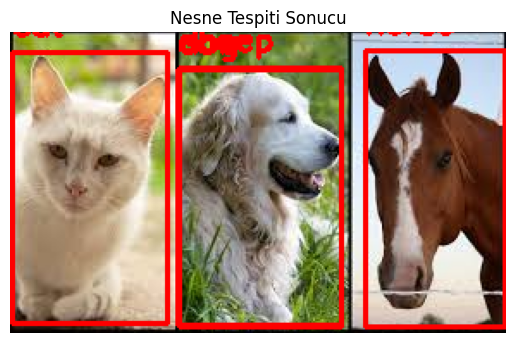

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Modeli yükle
model = YOLO('yolov8n.pt')  # veya 'yolov8s.pt', 'yolov8m.pt' daha güçlü versiyonlar

# Kendi resmini yükle
img_path = 'hayvan.jpeg'

# Tahmin yap
results = model(img_path)

# Sonucu çiz ve göster
results[0].show()

# Alternatif olarak matplotlib ile göster
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cls = int(box.cls[0])
    label = model.names[cls]
    cv2.putText(img_rgb, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.axis('off')
plt.title("Nesne Tespiti Sonucu")
plt.show()



image 1/1 c:\Users\90551\Desktop\Grnt ileme\insan.jpeg: 448x640 4 persons, 100.1ms
Speed: 3.5ms preprocess, 100.1ms inference, 10.1ms postprocess per image at shape (1, 3, 448, 640)


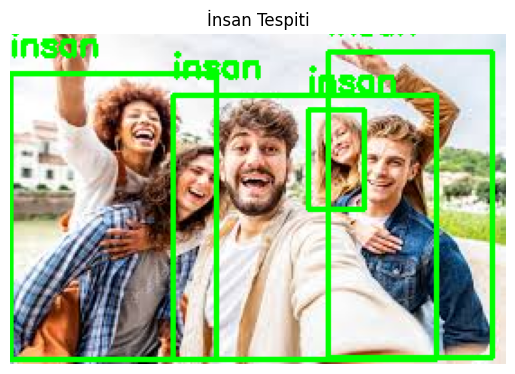

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Modeli yükle (YOLOv8n en hafif modeldir)
model = YOLO('yolov8n.pt')  # İstersen 'yolov8s.pt', 'yolov8m.pt' de kullanabilirsin

# Görsel yolu
img_path = 'insan.jpeg'

# Tahmin yap
results = model(img_path)

# Sonuçları göster (her sınıf)
results[0].show()

# Sadece insanlar için bounding box çizimi
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for box in results[0].boxes:
    cls = int(box.cls[0])
    if cls == 0:  # Sadece insan (COCO class id: 0)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_rgb, "insan", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

plt.imshow(img_rgb)
plt.axis('off')
plt.title("İnsan Tespiti")
plt.show()


In [4]:
from ultralytics import YOLO
import cv2

# 1. YOLOv8 modelini yükle
model = YOLO("yolov8n.pt")  # Hafif model, istersen 'yolov8s.pt' de kullanabilirsin

# 2. Video dosyasını oku
video_path = "insanlar.mp4"
results = model(source=video_path, stream=True)

# 3. Video üzerinde tespitleri çiz
for r in results:
    frame = r.orig_img.copy()

    # Her kutuyu kontrol et
    for box in r.boxes:
        cls = int(box.cls[0])
        if cls == 0:  # Sadece insan sınıfı
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, "insan", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Sonucu göster
    cv2.imshow("YOLOv8 - İnsan Tespiti", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()



video 1/1 (frame 1/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 37 persons, 2 birds, 57.1ms
video 1/1 (frame 2/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 37 persons, 2 birds, 68.4ms
video 1/1 (frame 3/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 35 persons, 2 birds, 62.7ms
video 1/1 (frame 4/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 35 persons, 2 birds, 68.7ms
video 1/1 (frame 5/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 37 persons, 2 birds, 51.7ms
video 1/1 (frame 6/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 37 persons, 2 birds, 53.0ms
video 1/1 (frame 7/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 35 persons, 2 birds, 56.7ms
video 1/1 (frame 8/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 35 persons, 3 birds, 60.5ms
video 1/1 (frame 9/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 35 persons, 2 birds, 47.2ms
video 1/1 (frame 10/345) c:

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

# 1. Model yükle
model = YOLO("yolov8n.pt")

# 2. Video aç
video_path = "insanlar.mp4"
cap = cv2.VideoCapture(video_path)

# 3. Sayılmış kişi ID’lerini tutmak için yapı
person_centroids = []
total_person_count = 0
DIST_THRESHOLD = 50  # Aynı kişi sayılmaması için mesafe eşiği

def is_new_person(cx, cy, existing_centroids):
    for ex, ey in existing_centroids:
        distance = np.sqrt((cx - ex) ** 2 + (cy - ey) ** 2)
        if distance < DIST_THRESHOLD:
            return False  # Aynı kişi
    return True  # Yeni kişi

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 4. Tahmin yap (tek karede)
    results = model(frame)

    for box in results[0].boxes:
        cls = int(box.cls[0])
        if cls == 0:  # Yalnızca insan
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cx = (x1 + x2) // 2
            cy = (y1 + y2) // 2

            # Yeni kişi mi kontrol et
            if is_new_person(cx, cy, person_centroids):
                person_centroids.append((cx, cy))
                total_person_count += 1

            # Kutuyu çiz
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, "insan", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)

    # 5. Kalabalık yoğunluğu yazdır
    cv2.putText(frame, f"Toplam Kisi: {total_person_count}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    cv2.imshow("Kalabalik Takibi", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 37 persons, 2 birds, 58.0ms
Speed: 1.9ms preprocess, 58.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 74.3ms
Speed: 3.2ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 2 birds, 65.9ms
Speed: 1.8ms preprocess, 65.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 2 birds, 76.0ms
Speed: 2.4ms preprocess, 76.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 51.8ms
Speed: 1.6ms preprocess, 51.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 53.7ms
Speed: 1.3ms preprocess, 53.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 2 birds, 59.2ms
Speed: 1.4ms preprocess, 59.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 3 birds, 59.9ms
S

In [1]:
from ultralytics import YOLO
import cv2

# 1. YOLOv8 modelini yükle
model = YOLO("yolov8n.pt")

# 2. Video kaynağı
video_path = "insanlar.mp4"
cap = cv2.VideoCapture(video_path)

# 3. Video kaydedici ayarları
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter("cikti.mp4", fourcc, fps, (width, height))

cap.release()

# 4. ID takibi
counted_ids = set()

def process_frame(frame, results):
    global counted_ids
    for box in results[0].boxes:
        cls = int(box.cls[0])
        if cls == 0:  # insan
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            track_id = int(box.id[0]) if box.id is not None else None

            if track_id is not None:
                counted_ids.add(track_id)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"ID {track_id}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    cv2.putText(frame, f"Toplam Kisi: {len(counted_ids)}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    return frame

# 5. Takip başlat
results = model.track(
    source=video_path,
    tracker="botsort.yaml",
    persist=True,
    classes=[0],
    stream=True
)

# 6. Kareleri işle ve kaydet (gösterme!)
for r in results:
    frame = r.orig_img.copy()
    processed = process_frame(frame, [r])
    out.write(processed)

out.release()
cv2.destroyAllWindows()




video 1/1 (frame 1/345) c:\Users\90551\Desktop\Grnt ileme\insanlar.mp4: 384x640 37 persons, 90.2ms


: 